In [ ]:
import pandas as pd
import numpy as np
#import seaborn as sns
from scipy import stats
#import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC


In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#df['age'].dtypes #.dtypes

In [ ]:
#for i in a:
#  if((df[i].dtypes == 'int64') or (df[i].dtypes == 'float64')):

#    plot_data(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.drop('id',axis= 1, inplace = True)

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


<ipython-input-10-698901b4e538>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],ax=axes[0])


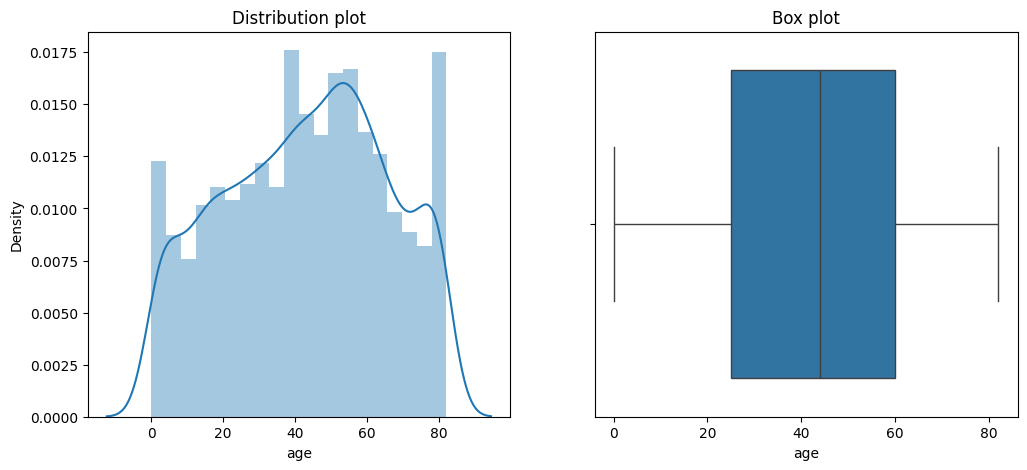

In [ ]:
f,axes=plt.subplots(1,2,figsize=(12,5))
sns.boxplot(x='age',data=df,orient='h',ax=axes[1])
sns.distplot(df['age'],ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

<ipython-input-11-6388f7d6ca06>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['avg_glucose_level'],ax=axes[0])


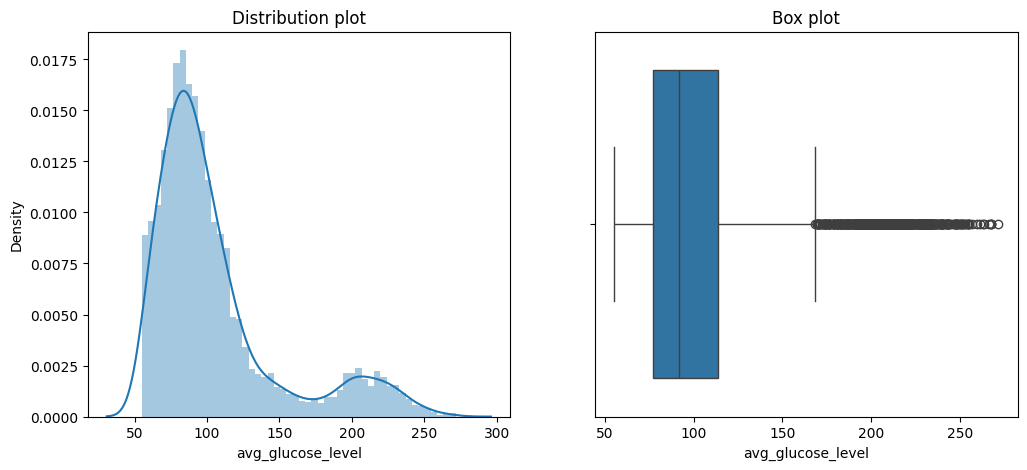

In [ ]:
f,axes = plt.subplots(1,2,figsize=(12,5))
sns.boxplot(x='avg_glucose_level',data=df,orient='h',ax=axes[1])
sns.distplot(df['avg_glucose_level'],ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

<ipython-input-12-3fbfacdbddab>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'],ax = axes[0])


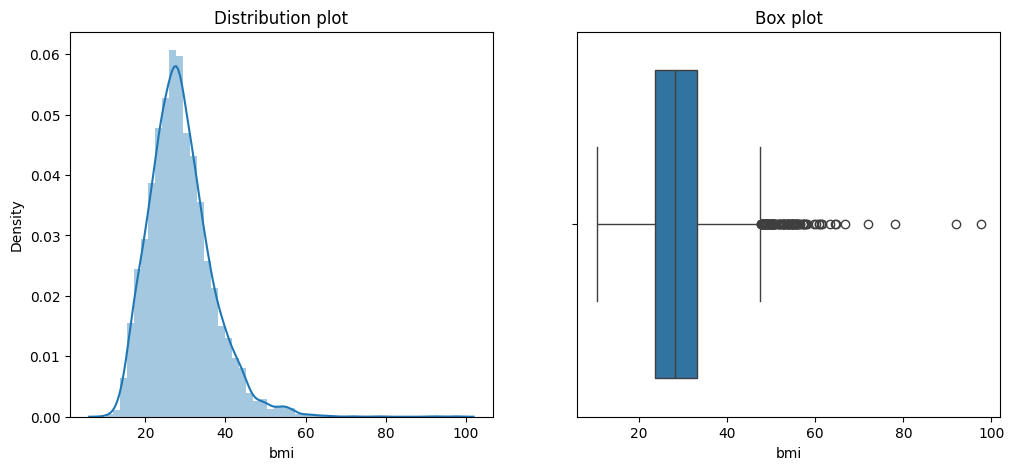

In [ ]:
f,axes = plt.subplots(1,2,figsize=(12,5))
sns.distplot(df['bmi'],ax = axes[0])
sns.boxplot(x='bmi',data=df,orient='h',ax = axes[1])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df['hypertension'].value_counts()

0    4458
1     451
Name: hypertension, dtype: int64

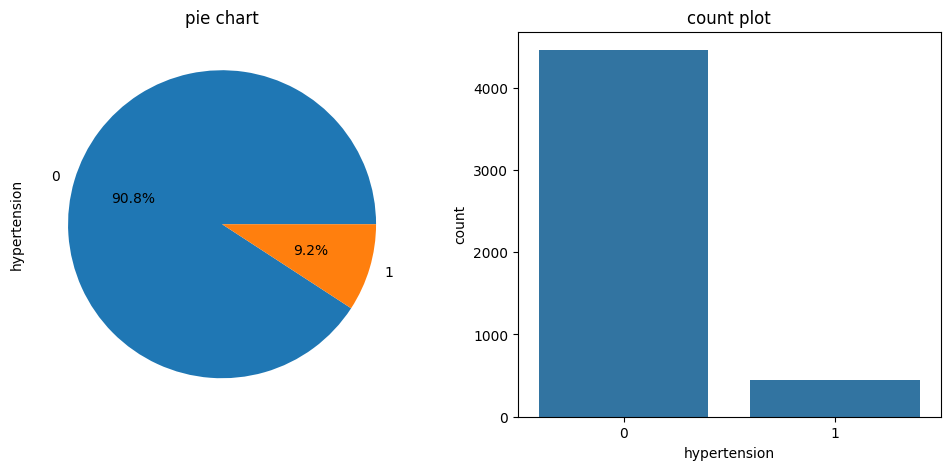

In [ ]:
f,axes = plt.subplots(1,2,figsize=(12,5))
df['hypertension'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot(x='hypertension',data=df,ax=axes[1])
axes[0].set_title('pie chart')
axes[1].set_title('count plot')
plt.show()


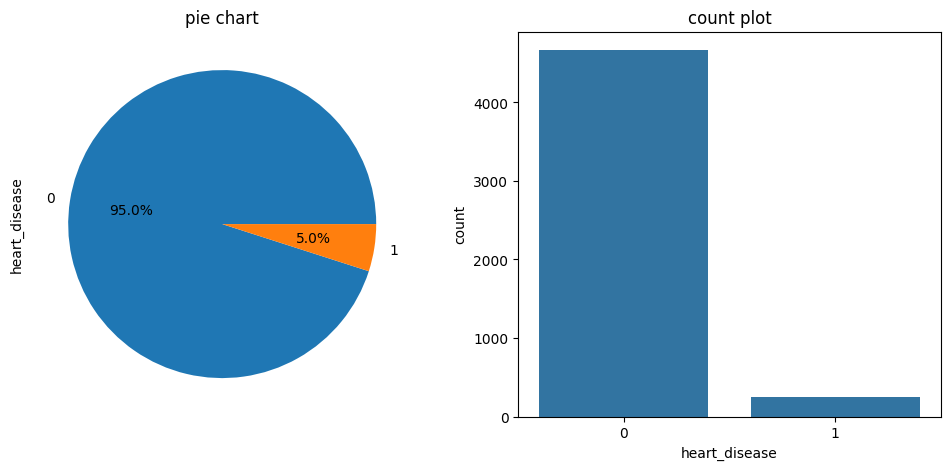

In [ ]:
f,axes = plt.subplots(1,2,figsize=(12,5))
df['heart_disease'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot(x='heart_disease',data=df,ax=axes[1])
axes[0].set_title('pie chart')
axes[1].set_title('count plot')
plt.show()

In [ ]:
df.drop(df[df['gender'] == 'Other'].index,inplace=True)

In [ ]:
#df['gender']=df['gender'].map({'Male':1,'Female':0})

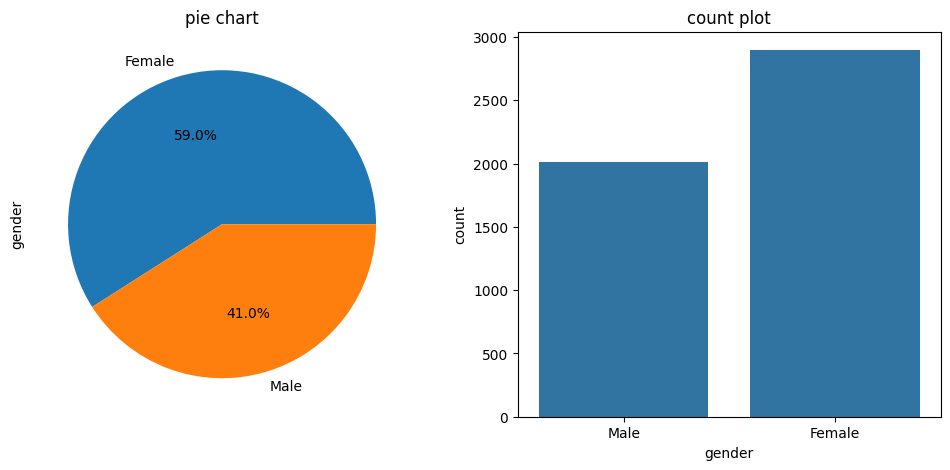

In [ ]:
f,axes = plt.subplots(1,2,figsize=(12,5))
df['gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot(x='gender',data=df,ax=axes[1]) #sns.countplot(x='heart_disease',data=df,ax=axes[1])
axes[0].set_title('pie chart')
axes[1].set_title('count plot')
plt.show()

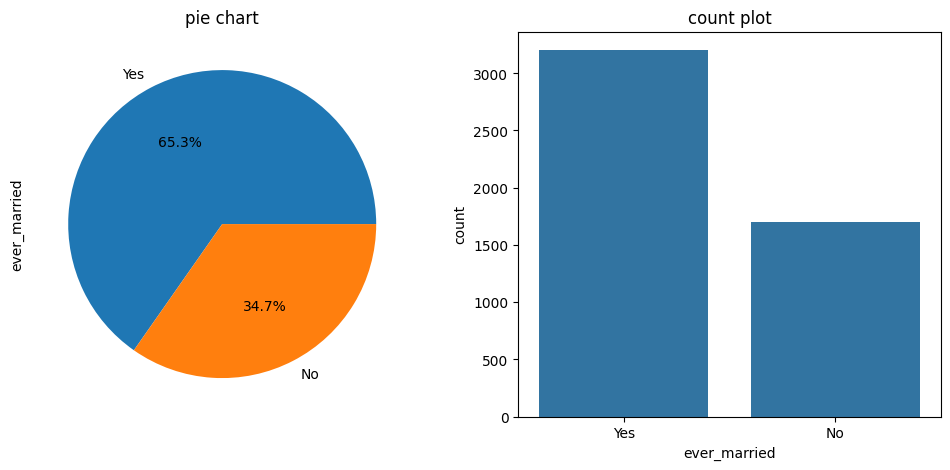

In [ ]:
f,axes = plt.subplots(1,2,figsize=(12,5))
df['ever_married'].value_counts().plot.pie(autopct = '%1.1f%%',ax = axes[0])
sns.countplot(x='ever_married',data=df,ax=axes[1])
axes[0].set_title('pie chart')
axes[1].set_title('count plot')
plt.show()

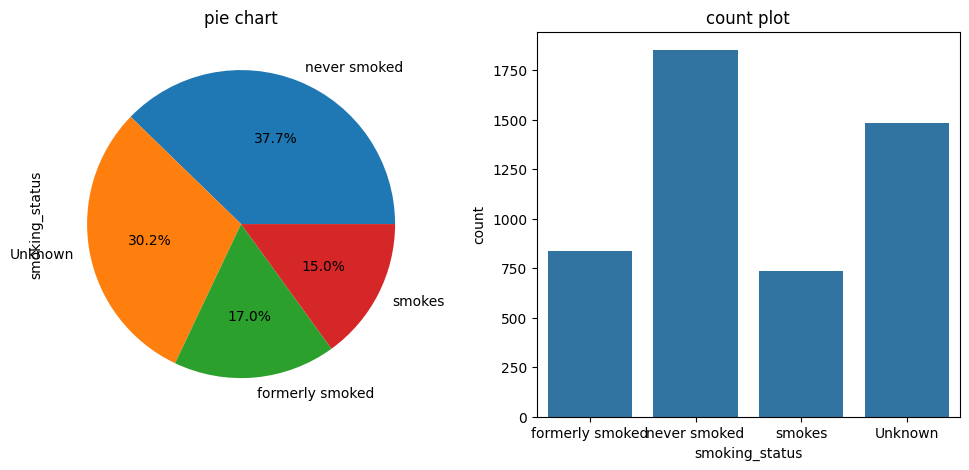

In [ ]:
f,axes = plt.subplots(1,2,figsize=(12,5))
df['smoking_status'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot(x='smoking_status',data=df,ax=axes[1])
axes[0].set_title('pie chart')
axes[1].set_title('count plot')
plt.show()

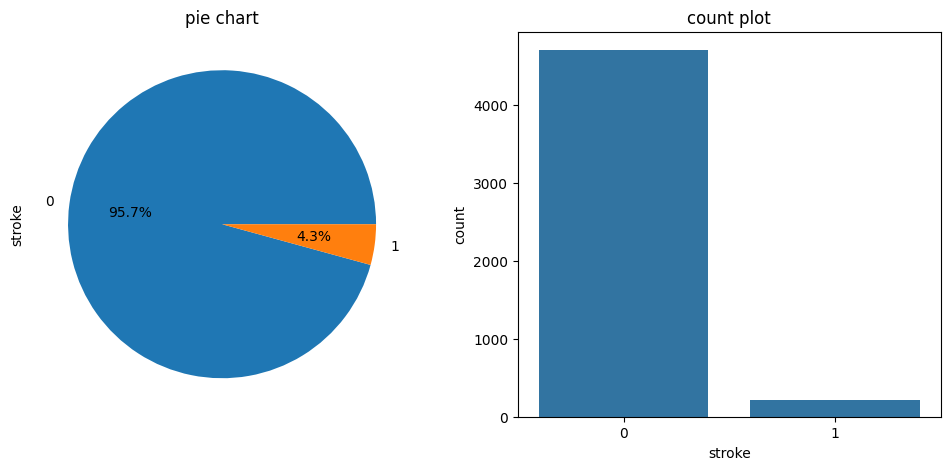

In [ ]:
f,axes = plt.subplots(1,2,figsize=(12,5))
df['stroke'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot(x='stroke',data=df,ax = axes[1])
axes[0].set_title('pie chart')
axes[1].set_title('count plot')
plt.show()

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## bpx plot

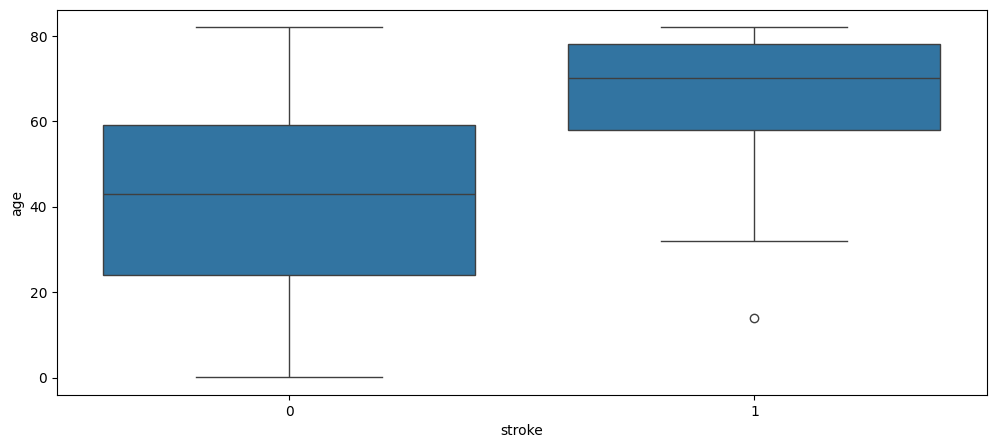

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x='stroke',y='age',data=df)
plt.show()

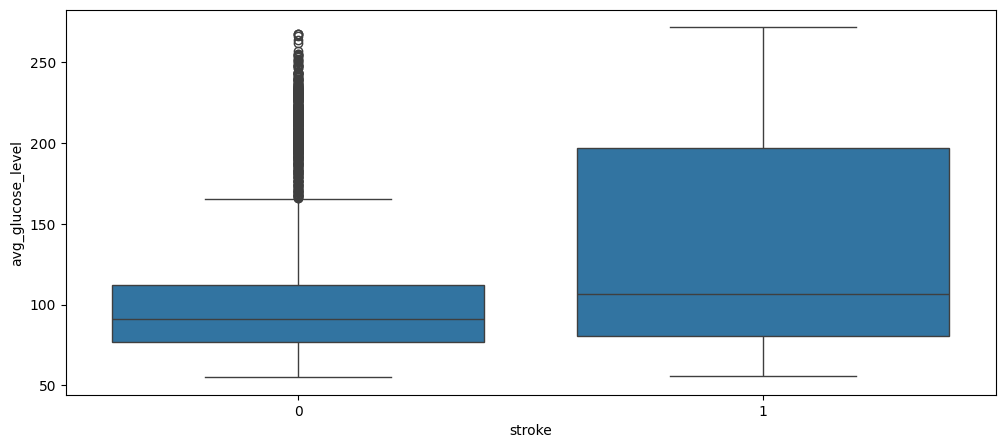

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x='stroke',y='avg_glucose_level',data=df)
plt.show()

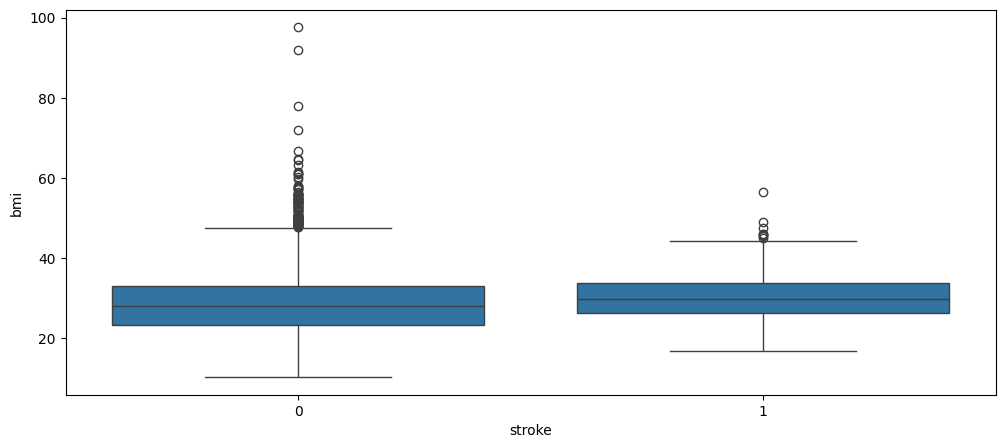

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x='stroke',y='bmi',data=df)
plt.show()

<ipython-input-27-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

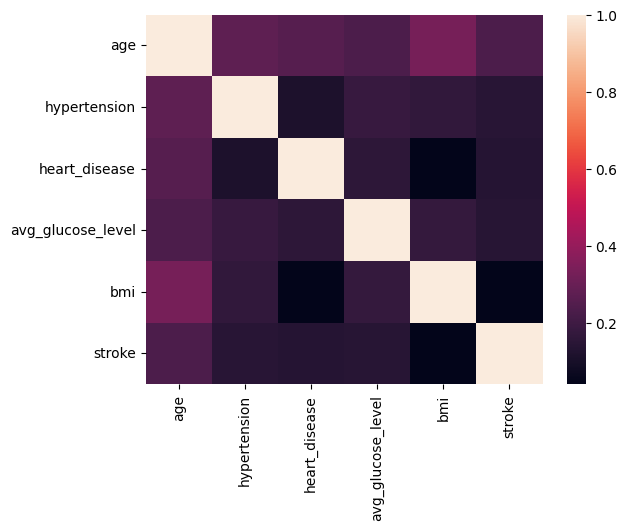

In [ ]:
sns.heatmap(df.corr())

In [ ]:
l = ['hypertension','heart_disease','smoking_status']

for i in l:
  df[i] = (df[i].astype('category'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             4908 non-null   object  
 1   age                4908 non-null   float64 
 2   hypertension       4908 non-null   category
 3   heart_disease      4908 non-null   category
 4   ever_married       4908 non-null   object  
 5   work_type          4908 non-null   object  
 6   Residence_type     4908 non-null   object  
 7   avg_glucose_level  4908 non-null   float64 
 8   bmi                4908 non-null   float64 
 9   smoking_status     4908 non-null   category
 10  stroke             4908 non-null   int64   
dtypes: category(3), float64(3), int64(1), object(4)
memory usage: 359.9+ KB


In [ ]:
#dummys = ['ever_married','work_type']

In [ ]:
#df['ever_married'].value_counts()

In [ ]:
#df['ever_married']=df['ever_married'].map({'Yes':1,'No':0})

## Hypotesis testing

One sample test

In [ ]:
from scipy.stats import ttest_1samp,ttest_ind,chi2_contingency

In [ ]:
l = ['age','avg_glucose_level','bmi'] #ttest,p_value =  ttest_1samp(df['age'].sample(frac=0.2),df['age'].mean())
for i in l:
  ttest,p_value = ttest_1samp(df[i].sample(frac=0.2),df[i].mean())
  if (p_value <0.05):
    print('reject Null Hypotesis, Alternet hypothes is mean of {0} population and sample is difference'.format(i))
  else:
    print('p_value',p_value)
    print('Fail to reject Null Hypotesis, Null Hypotesis is mean of {0} population and sample is same'.format(i))

p_value 0.1286445676180467
Fail to reject Null Hypotesis, Null Hypotesis is mean of age population and sample is same
p_value 0.4361023837183102
Fail to reject Null Hypotesis, Null Hypotesis is mean of avg_glucose_level population and sample is same
p_value 0.5877417014571036
Fail to reject Null Hypotesis, Null Hypotesis is mean of bmi population and sample is same


Two sample test

In [ ]:
df.loc[df['stroke'] == 0,'age']

249      3.0
250     58.0
251      8.0
252     70.0
253     14.0
        ... 
5104    13.0
5106    81.0
5107    35.0
5108    51.0
5109    44.0
Name: age, Length: 4699, dtype: float64

In [ ]:
l = ['age','avg_glucose_level','bmi'] # ttest,p_value = stats.ttest_ind(x,y,equal_var= False)

for i in l:
  x = df.loc[df['stroke'] == 0,i]
  y = df.loc[df['stroke'] == 1,i]
  ttest, p_value = ttest_ind(x,y,equal_var = False)
  print(p_value)
  if(p_value < 0.05):
    print('{} Rejecting Null Hypothesis.{} of stroke and non-stroke are not same'.format('\033[1m',i))
  else:
    print('{} Fail to Reject Null Hypothesis.{} of stroke and non-stroke are  same'.format('\033[1m',i))


6.017628610848082e-83
 Rejecting Null Hypothesis.age of stroke and non-stroke are not same
3.09346266829886e-11
 Rejecting Null Hypothesis.avg_glucose_level of stroke and non-stroke are not same
0.00033773775285922137
 Rejecting Null Hypothesis.bmi of stroke and non-stroke are not same


chi2 test

In [ ]:
a=pd.crosstab(df['smoking_status'],df['hypertension'])
c, p_value,dof,expected = stats.chi2_contingency(a)
a

hypertension,0,1
smoking_status,,
Unknown,1440,43
formerly smoked,726,110
never smoked,1636,216
smokes,655,82


In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
l=['hypertension','heart_disease','smoking_status']
for i in l:
  a = pd.crosstab(df['stroke'],df[i])
  c,p_value,dof,expected = chi2_contingency(a)
  print(p_value)
  if p_value < 0.05:  # Setting our significance level at 5%
      print('{} Rejecting Null Hypothesis. \n There is significant difference in {} Feature for different category of target variable(stroke and non-stroke)'.format('\033[1m',i))
  else:
      print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in {} Feature for different category of target variable(stroke and non-stroke)'.format('\033[1m',i))
      print('\n')


6.143875464115642e-23
 Rejecting Null Hypothesis. 
 There is significant difference in hypertension Feature for different category of target variable(stroke and non-stroke)
2.0990170036138994e-21
 Rejecting Null Hypothesis. 
 There is significant difference in heart_disease Feature for different category of target variable(stroke and non-stroke)
1.2146342910949484e-07
 Rejecting Null Hypothesis. 
 There is significant difference in smoking_status Feature for different category of target variable(stroke and non-stroke)


#outlier detection

In [ ]:
col = ['age','avg_glucose_level','bmi']
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(df[c],25),np.percentile(df[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    df_include = df.loc[(df[c] >= lower) & (df[c] <= upper)]
    mean=int(df_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    df[c]=np.where(df[c]>upper,mean,df[c])
    df[c]=np.where(df[c]<lower,mean,df[c])
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')

 Total Number of outliers in age Before Imputing : 0


 Mean of age is 42


 Total Number of outliers in age After Imputing : 0


 Total Number of outliers in avg_glucose_level Before Imputing : 569


 Mean of avg_glucose_level is 91


 Total Number of outliers in avg_glucose_level After Imputing : 0


 Total Number of outliers in bmi Before Imputing : 110


 Mean of bmi is 28


 Total Number of outliers in bmi After Imputing : 0




In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,91.00,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,91.00,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,91.00,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,91.00,29.0,formerly smoked,1


In [ ]:
l=['gender','ever_married','work_type','Residence_type']
df= pd.get_dummies(df,columns=l,drop_first=False)

In [ ]:
df['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

NameError: name 'prin' is not defined

In [ ]:
df['smoking_status'] = df['smoking_status'].map({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':3})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      4908 non-null   float64 
 1   hypertension             4908 non-null   category
 2   heart_disease            4908 non-null   category
 3   avg_glucose_level        4908 non-null   float64 
 4   bmi                      4908 non-null   float64 
 5   smoking_status           4908 non-null   category
 6   stroke                   4908 non-null   int64   
 7   gender_Female            4908 non-null   uint8   
 8   gender_Male              4908 non-null   uint8   
 9   ever_married_No          4908 non-null   uint8   
 10  ever_married_Yes         4908 non-null   uint8   
 11  work_type_Govt_job       4908 non-null   uint8   
 12  work_type_Never_worked   4908 non-null   uint8   
 13  work_type_Private        4908 non-null   uint8   
 14  work_typ

In [ ]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,67.0,0,1,91.00,36.6,2,1,0,1,0,1,0,0,1,0,0,0,1
2,80.0,0,1,105.92,32.5,0,1,0,1,0,1,0,0,1,0,0,1,0
3,49.0,0,0,91.00,34.4,3,1,1,0,0,1,0,0,1,0,0,0,1
4,79.0,1,0,91.00,24.0,0,1,1,0,0,1,0,0,0,1,0,1,0
5,81.0,0,0,91.00,29.0,2,1,0,1,0,1,0,0,1,0,0,0,1


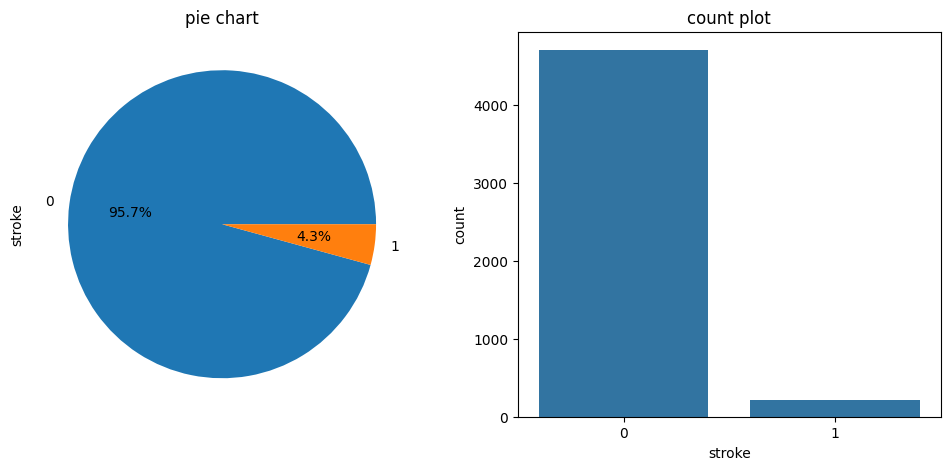

In [ ]:
f,axes = plt.subplots(1,2,figsize=(12,5))
df['stroke'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot(x='stroke',data=df,ax = axes[1])
axes[0].set_title('pie chart')
axes[1].set_title('count plot')
plt.show()

In [ ]:
x= df.drop(columns='stroke')
y= df['stroke']

In [ ]:
print(y.value_counts())

0    4699
1     209
Name: stroke, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      4908 non-null   float64 
 1   hypertension             4908 non-null   category
 2   heart_disease            4908 non-null   category
 3   avg_glucose_level        4908 non-null   float64 
 4   bmi                      4908 non-null   float64 
 5   smoking_status           4908 non-null   category
 6   stroke                   4908 non-null   int64   
 7   gender_Female            4908 non-null   uint8   
 8   gender_Male              4908 non-null   uint8   
 9   ever_married_No          4908 non-null   uint8   
 10  ever_married_Yes         4908 non-null   uint8   
 11  work_type_Govt_job       4908 non-null   uint8   
 12  work_type_Never_worked   4908 non-null   uint8   
 13  work_type_Private        4908 non-null   uint8   
 14  work_typ

In [ ]:
sm = SMOTENC(categorical_features=[1,2,5],random_state=42)
x,y = sm.fit_resample(x,y)

In [ ]:
y.value_counts()

1    4699
0    4699
Name: stroke, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=47)

In [ ]:
x_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
2410,60.000000,0,0,70.520000,26.500000,2,0,1,0,1,0,0,1,0,0,1,0
6229,79.494325,0,0,68.238897,25.795460,3,1,0,0,1,0,0,0,0,0,0,1
1862,5.000000,0,0,109.400000,20.000000,1,1,0,1,0,0,0,0,0,1,1,0
3245,23.000000,0,0,87.870000,23.400000,0,0,1,1,0,0,0,1,0,0,0,1
3821,62.000000,0,1,90.610000,25.800000,3,0,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,20.000000,0,0,92.440000,33.400000,0,1,0,1,0,0,0,1,0,0,0,1
8883,68.856342,0,0,91.000000,42.640856,2,0,0,0,1,0,0,1,0,0,0,0
6728,81.000000,1,0,91.000000,28.251315,2,0,0,0,1,0,0,1,0,0,0,0
1926,54.000000,0,0,100.290000,30.200000,0,1,0,0,1,0,0,1,0,0,0,1


In [ ]:
y_train.shape

(7518,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mn = MinMaxScaler()
x_train = mn.fit_transform(x_train)
x_test = mn.transform(x_test)


#Model Building

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsTransformer

In [ ]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")


def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend()#;

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

In [ ]:
nb = GaussianNB()
params_NB = {'var_smoothing':[1e-15,1e-14,1e-13,1e-12,1e-11, 1e-10, 1e-9,1e-8,1e-7]}

gs_nd = GridSearchCV(estimator = nb, param_grid = params_NB,cv=10,verbose = 1, scoring = 'accuracy')

gs_nd.fit(x_train,y_train) #x_train,x_test,y_train,y_test

gs_nd.best_params_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


{'var_smoothing': 1e-07}

In [ ]:
ga=GaussianNB(var_smoothing=1e-08)
ga.fit(x_train,y_train)

GaussianNB(var_smoothing=1e-08)

In [ ]:
fpr,tpr, thresholds = roc_curve(y_test, ga.predict(x_test))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 1


In [ ]:
y_test_pred_t = ga.predict(x_test)
y_test_pred_t = (y_test_pred_t > 0.8288209)
evaluate_nn(y_test, y_test_pred_t, train=False)

Test Result:
Accuracy Score: 70.59%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.937107    0.627227  0.705851     0.782167      0.787112
recall       0.460825    0.967033  0.705851     0.713929      0.705851
f1-score     0.617830    0.760917  0.705851     0.689373      0.687090
support    970.000000  910.000000  0.705851  1880.000000   1880.000000
_______________________________________________
Confusion Matrix: 
 [[447 523]
 [ 30 880]]



## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ad = AdaBoostClassifier()

param_ad = {'n_estimators':[10,20,30,40,50,60],
            'learning_rate':[0.001,0.01,1.0],
            'algorithm':['SAMME', 'SAMME.R']}


gd_ad = GridSearchCV(estimator = ad, param_grid=param_ad, cv=10,n_jobs=-1,scoring='accuracy')

gd_ad.fit(x_train,y_train)
gd_ad.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 60}

In [ ]:
ad = AdaBoostClassifier(n_estimators=60,learning_rate=1.0,algorithm='SAMME.R')
ad.fit(x_train,y_train)



y_ad = ad.predict(x_test)


evaluate_nn(y_test, y_ad.round(), train=False)

Test Result:
Accuracy Score: 92.93%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.908293    0.954386  0.929255     0.931339      0.930604
recall       0.959794    0.896703  0.929255     0.928249      0.929255
f1-score     0.933333    0.924646  0.929255     0.928990      0.929128
support    970.000000  910.000000  0.929255  1880.000000   1880.000000
_______________________________________________
Confusion Matrix: 
 [[931  39]
 [ 94 816]]



In [ ]:
#from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
# gb = GradientBoostingClassifier()

# param_gb = {'loss' : ['log_loss', 'deviance', 'exponential'],
#             'learning_rate':[0.001,0.01,1.0], 'n_estimators':[10,20,30,40,50,100,110],
#             'criterion' : ['friedman_mse', 'squared_error'], 'max_depth':[1,2,3,4,5]}

# gd_gb = GridSearchCV(estimator = gb, param_grid=param_gb, cv=10,n_jobs=-1,scoring='accuracy')
# gd_gb.fit(x_train,y_train)
# gd_gb.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

param_rf = {'n_estimators':[10,30,50,70,100,120],'criterion':["gini", "entropy", "log_loss"]}

ga_rf = GridSearchCV(estimator = rf, param_grid=param_rf, cv=10,n_jobs=-1,scoring='accuracy')
ga_rf.fit(x_train,y_train)
ga_rf.best_params_

{'criterion': 'log_loss', 'n_estimators': 70}

In [ ]:
rf = RandomForestClassifier(criterion ='log_loss',n_estimators= 70)
rf.fit(x_train,y_train)
y_rf = rf.predict(x_test)
evaluate_nn(y_test, y_rf.round(), train=False)

Test Result:
Accuracy Score: 96.70%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.963265    0.971111  0.967021     0.967188      0.967063
recall       0.973196    0.960440  0.967021     0.966818      0.967021
f1-score     0.968205    0.965746  0.967021     0.966975      0.967015
support    970.000000  910.000000  0.967021  1880.000000   1880.000000
_______________________________________________
Confusion Matrix: 
 [[944  26]
 [ 36 874]]



## ANN

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import kerastuner as kt

<ipython-input-74-c0054a8aa7e5>:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
x_train,x_vali,y_train,y_vali=train_test_split(x_train,y_train,test_size=0.1,random_state=41)

In [ ]:
def build_model(hp):

  model = Sequential()

  counter = 0

  for i in range(hp.Int('num_layer',min_value=3,max_value=15,step=3)):

    if counter == 0:
      #model.add(Dense(hp.Int('units'+str(i),min_value=16,max_value=128, step = 16),activation = hp.Choice('activation'+str(i),values=['relu','sigmoid','tanh']),input_dim=9))
      model.add(Dense(hp.Int('units'+str(i),min_value=17,max_value=500,step = 16),activation=hp.Choice('activation'+str(i),values=['relu','sigmoid','tanh']),input_dim=17))


    else:

      model.add(Dense(hp.Int('units'+str(i),min_value=17,max_value=150),activation=hp.Choice('activation'+str(i),values=['relu','sigmoid','tanh'])))
      counter+=1
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer= hp.Choice('optimizer',values=['adam','sgd','rmsprop','adadelta']),loss = 'binary_crossentropy',metrics=['accuracy'])

  return model

In [ ]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=3,directory='mydir',project_name='ak3')

In [ ]:
tuner.search(x_train,y_train,epochs=3,validation_data=(x_vali,y_vali),batch_size=20)

Trial 3 Complete [00h 00m 11s]
val_accuracy: 0.5169867277145386

Best val_accuracy So Far: 0.7223042845726013
Total elapsed time: 00h 00m 34s


In [ ]:
tuner.results_summary()

Results summary
Results in mydir/ak3
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
num_layer: 3
units0: 273
activation0: sigmoid
units1: 497
activation1: relu
units2: 465
activation2: relu
optimizer: sgd
Score: 0.7223042845726013

Trial 1 summary
Hyperparameters:
num_layer: 12
units0: 257
activation0: sigmoid
units1: 369
activation1: relu
units2: 353
activation2: tanh
optimizer: rmsprop
units3: 17
activation3: relu
units4: 17
activation4: relu
units5: 17
activation5: relu
units6: 17
activation6: relu
units7: 17
activation7: relu
units8: 17
activation8: relu
units9: 17
activation9: relu
units10: 17
activation10: relu
units11: 17
activation11: relu
Score: 0.5169867277145386

Trial 2 summary
Hyperparameters:
num_layer: 9
units0: 209
activation0: sigmoid
units1: 209
activation1: sigmoid
units2: 353
activation2: tanh
optimizer: adam
units3: 65
activation3: tanh
units4: 161
activation4: sigmoid
units5: 305
activation5: relu
units6: 4

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layer': 3,
 'units0': 273,
 'activation0': 'sigmoid',
 'units1': 497,
 'activation1': 'relu',
 'units2': 465,
 'activation2': 'relu',
 'optimizer': 'sgd'}

In [ ]:
model_h=tuner.get_best_models(num_models=1)[0]

In [ ]:
model_h.fit(x_train,y_train,epochs=25,initial_epoch=3,validation_split=0.2,batch_size=32)

Epoch 4/25
153/153 [==============================] - 2s 8ms/step - loss: 0.6627 - accuracy: 0.6567 - val_loss: 0.6556 - val_accuracy: 0.6076
Epoch 5/25
153/153 [==============================] - 1s 10ms/step - loss: 0.6474 - accuracy: 0.6951 - val_loss: 0.6582 - val_accuracy: 0.5049
Epoch 6/25
153/153 [==============================] - 2s 12ms/step - loss: 0.6238 - accuracy: 0.7239 - val_loss: 0.6238 - val_accuracy: 0.6700
Epoch 7/25
153/153 [==============================] - 1s 7ms/step - loss: 0.5947 - accuracy: 0.7442 - val_loss: 0.5983 - val_accuracy: 0.6223
Epoch 8/25
153/153 [==============================] - 1s 7ms/step - loss: 0.5539 - accuracy: 0.7752 - val_loss: 0.5384 - val_accuracy: 0.8013
Epoch 9/25
153/153 [==============================] - 1s 7ms/step - loss: 0.5083 - accuracy: 0.7904 - val_loss: 0.8430 - val_accuracy: 0.4967
Epoch 10/25
153/153 [==============================] - 1s 7ms/step - loss: 0.4575 - accuracy: 0.8187 - val_loss: 0.6236 - val_accuracy: 0.6675
Epo

In [ ]:
y_ann = model_h.predict(x_test)

59/59 [==============================] - 0s 2ms/step


In [ ]:
evaluate_nn(y_test, y_ann.round(), train=False)

Test Result:
Accuracy Score: 89.31%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.828352    1.000000  0.893085     0.914176      0.911437
recall       1.000000    0.779121  0.893085     0.889560      0.893085
f1-score     0.906119    0.875849  0.893085     0.890984      0.891467
support    970.000000  910.000000  0.893085  1880.000000   1880.000000
_______________________________________________
Confusion Matrix: 
 [[970   0]
 [201 709]]



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay

In [ ]:
print(roc_auc_score(y_test, y_ann.round()))
print(roc_auc_score(y_test,y_rf.round()))
print(roc_auc_score(y_test,y_ad.round()))

0.8895604395604395
0.9668177183641101
0.9282485555681431


In [ ]:
# import scipy.stats as stat

# def plot_data(sample):
#     plt.figure(figsize=(10,6))
#     plt.subplot(1,2,1)
#     sns.histplot(sample)
#     plt.subplot(1,2,2)
#     stat.probplot(sample,dist='norm',plot=plt)
#     plt.show()


# a=df.columns
# for i in a:
#   plot_data(i)